In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
# Sample SMS dataset (replace this with your dataset)
df = pd.read_csv("spam.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5574 non-null   object
 1   message     5574 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [3]:
df.describe

<bound method NDFrame.describe of      label                                            message Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   
5572  spam             click below link for to get 500 rupees        NaN   
5573   ham       don't click below link for to get 500 rupees        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [4]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5574, 5)

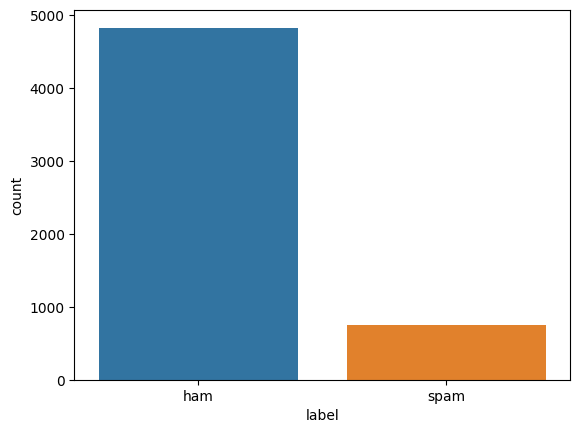

In [6]:
sns.countplot(x='label', data=df)
plt.show()


In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stemming
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
#4.1.3 Split dataset to Training and Testing sets
# Split the dataset into training and testing sets


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2)
# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer()
X_train_matrix = vectorizer.fit_transform(X_train)
X_test_matrix = vectorizer.transform(X_test)

In [9]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_matrix, y_train)

MultinomialNB()

In [10]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_matrix)

In [11]:
# Display the frequency table
word_frequencies = pd.DataFrame(X_train_matrix.toarray(), columns=vectorizer.get_feature_names_out())
word_frequencies['label'] = y_train.reset_index(drop=True)
spam_word_frequencies = word_frequencies[word_frequencies['label'] == 'spam'].drop('label', axis=1).sum(axis=0)
ham_word_frequencies = word_frequencies[word_frequencies['label'] == 'ham'].drop('label', axis=1).sum(axis=0)


In [12]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
total_spam = np.sum(conf_matrix[1, :])
total_ham = np.sum(conf_matrix[0, :])
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[950   4]
 [  5 156]]


In [13]:
# Print total spam and ham messages
print("\nTotal Spam Messages:", total_spam)
print("Total Ham Messages:", total_ham)

print("\nSpam Word Frequencies:")
print(spam_word_frequencies[spam_word_frequencies > 0].sort_values(ascending=False)[:10])

print("\nHam Word Frequencies:")
print(ham_word_frequencies[ham_word_frequencies > 0].sort_values(ascending=False)[:10])



Total Spam Messages: 161
Total Ham Messages: 954

Spam Word Frequencies:
to      533
call    287
you     236
your    204
free    168
the     162
for     160
now     155
or      149
is      133
dtype: int64

Ham Word Frequencies:
you     1559
to      1249
the      899
and      679
in       663
me       621
my       611
is       594
it       578
that     444
dtype: int64


In [14]:
while True:
    k = input('\nEnter Message: ')

# Transforming the user input to match the format of the training data
    data = [preprocess_text(k)]
    data = vectorizer.transform(data)

# Predicting whether the message is spam or not using Naive Bayes
    result_nb = nb_classifier.predict(data)

# Displaying the classification result
    if result_nb == 'ham':
        print('Not A Spam')
    else:
        print('Spam Message')

# Calculate and display accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)
    ch=input("\nDo you want to continue Y/N:")
    if ch.lower()!="yes" and ch.lower()!="y":
        break


Enter Message:  hii


Not A Spam

Accuracy: 0.9919282511210762



Do you want to continue Y/N: y

Enter Message:  Click below link for to get 500 rupees


Spam Message

Accuracy: 0.9919282511210762



Do you want to continue Y/N: n
